In [1]:
#limiting the GPU
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.70  # Set to 70% 
config.gpu_options.allow_growth = True

session = InteractiveSession(config=config)

2024-05-01 13:06:33.277180: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 13:06:34.382519: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.8/lib64
2024-05-01 13:06:34.382607: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.8/lib64
2024-05-01 13:06:34.382618: W tensorflow/compiler/tf2tensorrt/utils/py_utils

In [2]:

import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
MASK_CHANNELS = 1

TRAIN_PATH = '/home/ms/Documents/Aditya/Experiment/code/4/dataset/final/train/'
TEST_PATH = '/home/ms/Documents/Aditya/Experiment/code/4/dataset/final/test/'

TRAIN_PATH_IMAGE = '/home/ms/Documents/Aditya/Experiment/code/4/dataset/final/train/train_final_samename/seg_img/'
TRAIN_PATH_MASK = '/home/ms/Documents/Aditya/Experiment/code/4/dataset/final/train/train_final_samename/seg_mask/'
TEST_PATH_IMAGE = '/home/ms/Documents/Aditya/Experiment/code/4/dataset/final/test/test_final_samename/seg_img/'
TEST_PATH_MASK = '/home/ms/Documents/Aditya/Experiment/code/4/dataset/final/test/test_final_samename/seg_mask/'


train_ids = next(os.walk(TRAIN_PATH_IMAGE))    #Read all the ids from train 
train_mask_ids = next(os.walk(TRAIN_PATH_MASK))
test_ids = next(os.walk(TEST_PATH_IMAGE))      #Read all the ids from test
test_mask_ids = next(os.walk(TEST_PATH_MASK))

X_train = np.zeros((len(train_ids[2]), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
#(( array's length,height,width,number of channel), data type)
Y_train = np.zeros((len(train_ids[2]), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
#(( array's length,height,width,number of channel), data type)'

X_test = np.zeros((len(test_ids[2]), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
#(( array's length,height,width,number of channel), data type)
Y_test = np.zeros((len(test_mask_ids[2]), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
#(( array's length,height,width,number of channel), data type)'





/home/ms/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:55: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/home/ms/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:60: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [3]:
print(len(X_train))
print(len(Y_test))

3010
910


In [4]:
print(next(os.walk(TRAIN_PATH_IMAGE)))

('/home/ms/Documents/Aditya/Experiment/code/4/dataset/final/train/train_final_samename/seg_img/', [], ['Image_15_5_5.png', 'Image_38_0_6.png', 'Image_26_1_1.png', 'Image_24_0_4.png', 'Image_0_2_1.png', 'Image_11_5_7.png', 'Image_11_4_0.png', 'Image_18_2_7.png', 'Image_34_6_5.png', 'Image_27_1_4.png', 'Image_19_5_1.png', 'Image_6_4_3.png', 'Image_39_5_2.png', 'Image_38_6_5.png', 'Image_13_3_2.png', 'Image_40_6_8.png', 'Image_12_6_2.png', 'Image_4_3_3.png', 'Image_36_0_3.png', 'Image_28_4_8.png', 'Image_27_0_0.png', 'Image_29_5_5.png', 'Image_5_0_5.png', 'Image_6_0_9.png', 'Image_5_6_8.png', 'Image_33_0_1.png', 'Image_42_4_1.png', 'Image_34_4_6.png', 'Image_1_6_7.png', 'Image_23_6_1.png', 'Image_35_2_2.png', 'Image_11_6_1.png', 'Image_39_6_7.png', 'Image_9_6_9.png', 'Image_31_3_0.png', 'Image_13_0_7.png', 'Image_24_0_7.png', 'Image_3_1_4.png', 'Image_40_6_2.png', 'Image_23_3_7.png', 'Image_16_2_6.png', 'Image_27_4_4.png', 'Image_3_6_5.png', 'Image_7_0_2.png', 'Image_22_0_4.png', 'Image_3

In [5]:
print(len(train_ids[2]))

3010


In [6]:
print('Resizing training images and masks')
# for itr, n in tqdm(enumerate(train_ids[2]), total=1677): 
for itr, n in tqdm(enumerate(train_ids[2]), total=(len(train_ids[2]))):
    path_image = TRAIN_PATH_IMAGE #+ 'data/' + 'PSI_Tray031/' + 'tv/' + 'images/'
    # print(path_image)
    img = imread(path_image + n)[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[itr] = img  #Fill empty X_train with values from img


# for itr, n in tqdm(enumerate(train_mask_ids[2]), total=1677): 
for itr, n in tqdm(enumerate(train_mask_ids[2]), total=(len(train_ids[2]))):  
    path_mask = TRAIN_PATH_MASK #+ 'data/' + 'PSI_Tray031/' + 'tv/' + 'images/'
    mask = imread(path_mask + n)[:,:,:MASK_CHANNELS]  
    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    Y_train[itr] = mask  #Fill empty X_train with values from img




Resizing training images and masks


100%|██████████| 3010/3010 [00:14<00:00, 202.96it/s]


In [7]:
print('Resizing testing images and masks')
# for itr, n in tqdm(enumerate(train_ids[2]), total=1677): 
for itr, n in tqdm(enumerate(test_ids[2]), total=(len(test_ids[2]))):
    test_path_image = TEST_PATH_IMAGE #+ 'data/' + 'PSI_Tray031/' + 'tv/' + 'images/'
    # print(path_image)
    test_img = imread(test_path_image + n)[:,:,:IMG_CHANNELS]  
    test_img = resize(test_img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[itr] = test_img  #Fill empty X_test with values from img


# for itr, n in tqdm(enumerate(train_mask_ids[2]), total=1677): 
for itr, n in tqdm(enumerate(test_mask_ids[2]), total=(len(test_mask_ids[2]))):  
    test_path_mask = TEST_PATH_MASK #+ 'data/' + 'PSI_Tray031/' + 'tv/' + 'images/'
    test_mask = imread(test_path_mask + n)[:,:,:MASK_CHANNELS]  
    test_mask = resize(test_mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    Y_test[itr] = test_mask  #Fill empty X_train with values from img


Resizing testing images and masks


100%|██████████| 910/910 [00:04<00:00, 203.32it/s]


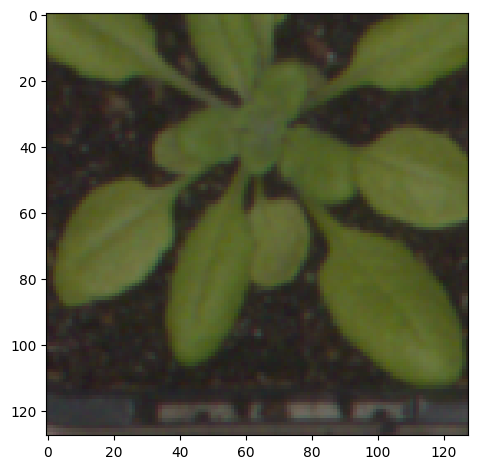

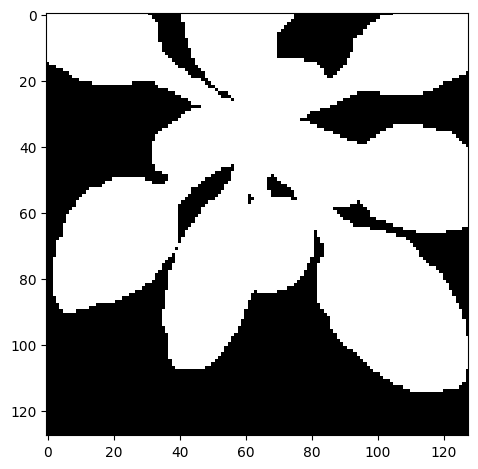

In [9]:
## print(len(train_ids[2]))
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()


In [10]:
import tensorflow as tf

# Define metrics functions

def precision(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

def accuracy(y_true, y_pred):
    correct_predictions = tf.keras.backend.sum(tf.keras.backend.cast(tf.keras.backend.equal(y_true, tf.keras.backend.round(y_pred)), tf.float32))
    total_predictions = tf.keras.backend.cast(tf.keras.backend.prod(tf.keras.backend.shape(y_true)), tf.float32)
    accuracy = correct_predictions / total_predictions
    return accuracy

def dice_coefficient(y_true, y_pred):
    intersection = tf.keras.backend.sum(y_true * y_pred)
    union = tf.keras.backend.sum(y_true) + tf.keras.backend.sum(y_pred)
    dice = (2. * intersection + tf.keras.backend.epsilon()) / (union + tf.keras.backend.epsilon())
    return dice

def intersection_over_union(y_true, y_pred):
    intersection = tf.keras.backend.sum(y_true * y_pred)
    union = tf.keras.backend.sum(tf.keras.backend.clip(y_true + y_pred, 0, 1))
    iou = (intersection + tf.keras.backend.epsilon()) / (union + tf.keras.backend.epsilon())
    return iou

# # Define your model architecture
# model = tf.keras.Sequential([
#     # Add your layers here
# ])

# # Compile the model with custom metrics
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[precision, recall, accuracy, dice_coefficient, intersection_over_union])

# Define your callbacks
# checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)
# early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')
# tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs')

# # Train the model with the specified callbacks
# results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=[checkpointer, early_stopping, tensorboard])


In [11]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Compile the model with custom metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[precision, recall, accuracy, dice_coefficient, intersection_over_union])

model.summary()

2024-05-01 13:08:33.761655: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5580 MB memory:  -> device: 0, name: Quadro RTX 4000, pci bus id: 0000:03:00.0, compute capability: 7.5


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [12]:
# ################################
# #Modelcheckpoint
# EPOCHS = 50
# BATCH_SIZE = 16

# checkpointer = tf.keras.callbacks.ModelCheckpoint('model_tray_tray.h5', verbose=1, save_best_only=True)


# callbacks = [
#         tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'),
#         tf.keras.callbacks.TensorBoard(log_dir='logs')]

# results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=callbacks)



In [13]:
################################
#Modelcheckpoint
EPOCHS = 40
BATCH_SIZE = 16
# checkpointer = tf.keras.callbacks.ModelCheckpoint('model_tray_tray.h5', verbose=1, save_best_only=True)

# Define your callbacks
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_tray_tray.h5', verbose=1, save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs')

# callbacks = [
#         tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'),
#         tf.keras.callbacks.TensorBoard(log_dir='logs')]

# results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=callbacks)

# Train the model with the specified callbacks
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[checkpointer, early_stopping, tensorboard])

Epoch 1/40


2024-05-01 13:08:49.783658: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-05-01 13:08:51.343214: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8902
2024-05-01 13:08:52.850698: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1d3085e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-01 13:08:52.850754: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Quadro RTX 4000, Compute Capability 7.5
2024-05-01 13:08:52.861214: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-01 13:08:53.020151: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster

170/170 [==============================] - ETA: 0s - loss: 0.0797 - precision: 0.9058 - recall: 0.8278 - accuracy: 0.9657 - dice_coefficient: 0.8431 - intersection_over_union: 0.7811
Epoch 1: val_loss improved from inf to 0.01869, saving model to model_tray_tray.h5
170/170 [==============================] - 23s 52ms/step - loss: 0.0797 - precision: 0.9058 - recall: 0.8278 - accuracy: 0.9657 - dice_coefficient: 0.8431 - intersection_over_union: 0.7811 - val_loss: 0.0187 - val_precision: 0.9891 - val_recall: 0.9700 - val_accuracy: 0.9933 - val_dice_coefficient: 0.9701 - val_intersection_over_union: 0.9420
Epoch 2/40
169/170 [============================>.] - ETA: 0s - loss: 0.0140 - precision: 0.9839 - recall: 0.9824 - accuracy: 0.9945 - dice_coefficient: 0.9745 - intersection_over_union: 0.9504
Epoch 2: val_loss improved from 0.01869 to 0.01245, saving model to model_tray_tray.h5
170/170 [==============================] - 7s 39ms/step - loss: 0.0140 - precision: 0.9839 - recall: 0.9824 

In [14]:
# Save the trained model
model.save('model_tray_tray.h5')

In [15]:


import tensorflow as tf
import numpy as np

# Load the test data
# X_test = ...
# Y_test = ...

# Load the model within a custom object scope
with tf.keras.utils.custom_object_scope({'precision': precision, 'recall': recall, 'accuracy': accuracy, 'dice_coefficient': dice_coefficient, 'intersection_over_union': intersection_over_union}):
    model = tf.keras.models.load_model('model_tray_tray.h5')

# Evaluate the model on the test data
test_loss, test_accuracy, test_precision, test_recall, test_dice, test_iou = model.evaluate(X_test, Y_test, verbose=0)

# Print the evaluation metrics
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test Dice Coefficient: {test_dice}')
print(f'Test Intersection over Union: {test_iou}')


Test Loss: 0.008920553140342236
Test Accuracy: 0.984569787979126
Test Precision: 0.9968502521514893
Test Recall: 0.996427595615387
Test Dice Coefficient: 0.9883829355239868
Test Intersection over Union: 0.9770382642745972


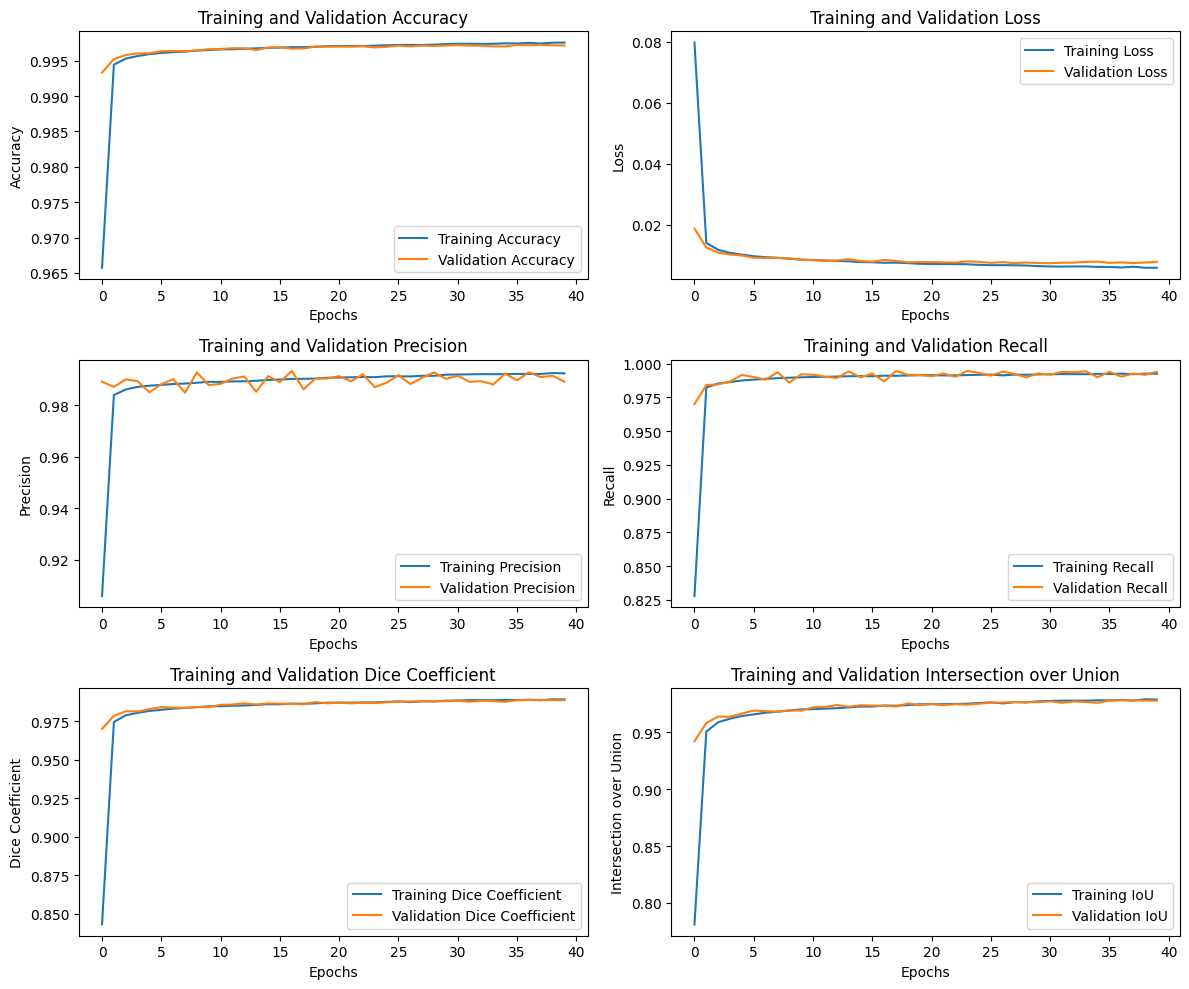

In [19]:
import matplotlib.pyplot as plt

# Get the metrics from the results
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

precision = results.history['precision']
val_precision = results.history['val_precision']

recall = results.history['recall']
val_recall = results.history['val_recall']

dice_coefficient = results.history['dice_coefficient']
val_dice_coefficient = results.history['val_dice_coefficient']

iou = results.history['intersection_over_union']
val_iou = results.history['val_intersection_over_union']

# Plot the metrics
plt.figure(figsize=(12, 10))

# Accuracy
plt.subplot(3, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss
plt.subplot(3, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Precision
plt.subplot(3, 2, 3)
plt.plot(range(EPOCHS), precision, label='Training Precision')
plt.plot(range(EPOCHS), val_precision, label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.title('Training and Validation Precision')

# Recall
plt.subplot(3, 2, 4)
plt.plot(range(EPOCHS), recall, label='Training Recall')
plt.plot(range(EPOCHS), val_recall, label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')

# Dice Coefficient
plt.subplot(3, 2, 5)
plt.plot(range(EPOCHS), dice_coefficient, label='Training Dice Coefficient')
plt.plot(range(EPOCHS), val_dice_coefficient, label='Validation Dice Coefficient')
plt.xlabel('Epochs')
plt.ylabel('Dice Coefficient')
plt.legend(loc='lower right')
plt.title('Training and Validation Dice Coefficient')

# Intersection over Union (IoU)
plt.subplot(3, 2, 6)
plt.plot(range(EPOCHS), iou, label='Training IoU')
plt.plot(range(EPOCHS), val_iou, label='Validation IoU')
plt.xlabel('Epochs')
plt.ylabel('Intersection over Union')
plt.legend(loc='lower right')
plt.title('Training and Validation Intersection over Union')

plt.tight_layout()
plt.show()
